<a href="https://colab.research.google.com/github/CindyMG/Core-II-W2/blob/main/Core_II_W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Defining the question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. 

You have been tasked to ***study the factors that affect housing prices*** using the given information on real estate properties that was collected over the past few months.

 Later onwards, **create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.** 

#Importing our libraries



In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading our dataset: [Housing dataset](http://bit.ly/IndependentProjectWeek7Dataset)

In [169]:
housing = pd.read_csv('/content/Housing.csv')
housing.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [170]:
#let us check the shape of our dataset (number of rows and columns)
housing.shape

(21613, 20)

#Checking our dataset

In [171]:
#this gives us info on the dataset such as data types and presence of null values
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

#Cleaning the dataset

1. Checking for null or missing values

In [172]:
housing.isnull().any()
#Great! Our dataset has no missing values. We can move on to the next cleaning procedure.

id               False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
dtype: bool

2. Checking for duplicates

In [173]:
#checking and dropping any duplicates in our dataset
housing.drop_duplicates(subset=None, keep='first', inplace=True)

#let us check how many records we have left after removing duplicates
housing.shape
# Our dataset had very few duplicates so there is no significant change in records. We can move on.

(21610, 20)

3. Checking for outliers

In [174]:
#let us find out the descriptive statistics
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [175]:
# next, we will create a boxplot to get a visual of the outliers
#let us define function , 'plot_boxplot'
def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

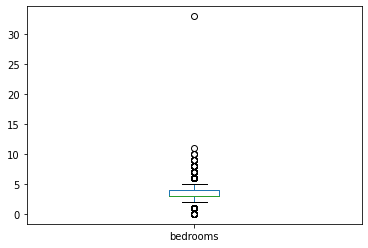

In [176]:
#now that we have defined the function, let us call it
#for the column 'bedrooms'
plot_boxplot(housing, "bedrooms")

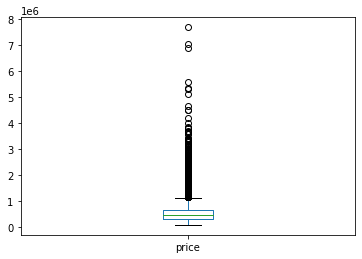

In [177]:
#for the column 'price'
plot_boxplot(housing, "price")

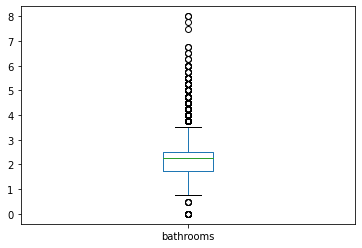

In [178]:
#for the column 'bedrooms'
plot_boxplot(housing, "bathrooms")

In [179]:
#we are going to define the function 'outliers'
#with the lower and upper bounds, we create a range 
#that defines that any value outside that give range is an outlier
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  ls = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]
  return ls

In [180]:
#create an empty list to store the outlier indexes from the rows
index_list = []
for column in ['bedrooms', 'price', 'bathrooms']:
  index_list.extend(outliers(housing, column))

In [181]:
index_list

[154,
 209,
 232,
 239,
 264,
 331,
 350,
 465,
 486,
 527,
 556,
 558,
 648,
 717,
 718,
 784,
 833,
 860,
 875,
 903,
 1066,
 1135,
 1149,
 1162,
 1163,
 1195,
 1228,
 1241,
 1266,
 1306,
 1315,
 1378,
 1389,
 1413,
 1457,
 1478,
 1503,
 1535,
 1539,
 1595,
 1629,
 1653,
 1660,
 1674,
 1712,
 1718,
 1734,
 1752,
 1882,
 1931,
 1956,
 1971,
 1975,
 1986,
 2008,
 2026,
 2031,
 2070,
 2074,
 2156,
 2306,
 2310,
 2345,
 2366,
 2382,
 2411,
 2496,
 2497,
 2516,
 2567,
 2629,
 2653,
 2668,
 2671,
 2687,
 2709,
 2727,
 2825,
 2852,
 2906,
 2927,
 2930,
 2973,
 3042,
 3079,
 3108,
 3119,
 3152,
 3223,
 3235,
 3253,
 3285,
 3303,
 3338,
 3383,
 3467,
 3489,
 3523,
 3540,
 3541,
 3582,
 3602,
 3613,
 3648,
 3661,
 3720,
 3721,
 3725,
 3745,
 3776,
 3805,
 3837,
 3874,
 3925,
 3936,
 3984,
 3987,
 4024,
 4035,
 4067,
 4089,
 4096,
 4107,
 4146,
 4197,
 4235,
 4240,
 4255,
 4344,
 4390,
 4410,
 4446,
 4581,
 4598,
 4639,
 4651,
 4654,
 4657,
 4701,
 4717,
 4760,
 4832,
 4867,
 4868,
 4890,
 5049

In [182]:
#define function 'remove' to clean out the outliers
def remove(df, ls):
  ls = sorted(set(ls))
  df = df.drop(ls)
  return df

In [183]:
Housing = remove(housing, index_list)

In [184]:
#let us check how many records we have left after cleaning out the outliers
Housing.shape

(19783, 20)

In [185]:
#here is the original dataset:
housing.shape

#Great! Now that we have cleaned out the outliers, we can move on to analysis.

(21610, 20)

#Exploratory Data Analysis

##Univariate analysis

In [186]:
# we want to analyse the distribution of points across our dataset
#using the groupby() function, we will group our prices according to the number of bedrooms
rooms = Housing.groupby(['bedrooms'])

# sort the values in descending order and preview them
price = rooms['price'].mean().sort_values( ascending = False).head(20)
price

bedrooms
5    575677.893365
4    542368.352165
3    439083.540125
2    392076.877103
Name: price, dtype: float64

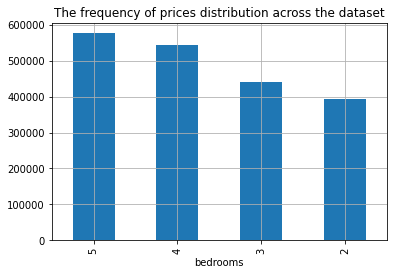

In [187]:
#plot a histogram to visualize the point distribution
price.plot(kind = 'bar')
plt.title('The frequency of prices distribution across the dataset')
plt.grid()
plt.show()

##Bivariate analysis

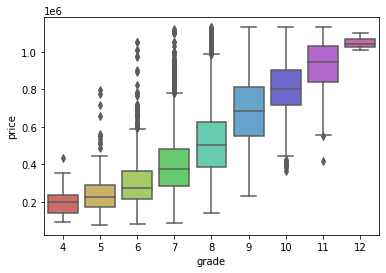

In [188]:
#using a boxplot, we will check for a relationship between prices and the various grades
sns.boxplot(x='grade', y='price', data=Housing, palette='hls')

#clearly, the prices increase with an increase in the grade! So these two variables are positively correlated.

##Checking multicollinearity between 'price' and the other variables

In [189]:
Housing.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.014339,0.014297,0.032906,0.012876,-0.132203,0.033163,-0.000444,0.019748,-0.027504,0.036325,0.017706,-0.007309,0.029235,-0.013630,-0.007979,0.003054,0.023976,0.015420,-0.144229
price,0.014339,1.000000,0.285144,0.431082,0.610338,0.088097,0.261244,0.050290,0.235636,0.040504,0.623062,0.512814,0.226220,0.048728,0.083127,-0.012700,0.437370,0.065200,0.552811,0.077277
bedrooms,0.014297,0.285144,1.000000,0.474261,0.588792,0.025731,0.152956,-0.030131,0.036615,0.019794,0.328125,0.469698,0.262110,0.177381,-0.003280,-0.165434,-0.044733,0.164966,0.402022,0.025395
bathrooms,0.032906,0.431082,0.474261,1.000000,0.693134,0.056538,0.509114,-0.004143,0.085538,-0.144636,0.609931,0.615120,0.199479,0.568083,0.013639,-0.216458,-0.014826,0.258878,0.524638,0.058314
sqft_living,0.012876,0.610338,0.588792,0.693134,1.000000,0.152262,0.331676,0.005170,0.163086,-0.075302,0.700283,0.846726,0.359225,0.354635,0.016920,-0.206022,0.009618,0.290897,0.743066,0.168145
sqft_lot,-0.132203,0.088097,0.025731,0.056538,0.152262,1.000000,-0.024994,0.025545,0.080322,-0.005431,0.087219,0.156596,0.006156,0.039332,0.009473,-0.127162,-0.097613,0.218112,0.140672,0.697847
floors,0.033163,0.261244,0.152956,0.509114,0.331676,-0.024994,1.000000,-0.001035,-0.020899,-0.282072,0.453411,0.524911,-0.308991,0.514696,-0.008260,-0.061991,0.036484,0.132857,0.260544,-0.030715
waterfront,-0.000444,0.050290,-0.030131,-0.004143,0.005170,0.025545,-0.001035,1.000000,0.287017,0.011867,-0.009070,-0.005069,0.018429,-0.035813,0.057623,0.043360,-0.045190,-0.057042,0.004913,0.034362
view,0.019748,0.235636,0.036615,0.085538,0.163086,0.080322,-0.020899,0.287017,1.000000,0.034783,0.127619,0.058477,0.198235,-0.069397,0.059622,0.100708,-0.026427,-0.077977,0.182568,0.078818
condition,-0.027504,0.040504,0.019794,-0.144636,-0.075302,-0.005431,-0.282072,0.011867,0.034783,1.000000,-0.176799,-0.183981,0.183833,-0.361943,-0.058800,-0.003332,-0.016755,-0.103926,-0.120667,0.000695


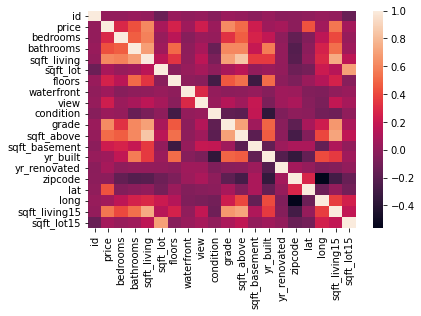

In [190]:
#use a heatmap to check multicollinearity of fields 
sns.heatmap(Housing.corr())

For **negative** correlation: There is only one field 'zipcode', and it is a very weak correlation so we shall not consider this.

In [191]:
# we're going to drop the columns that we aren't going to use

Housing.drop(['id', 'zipcode', 'yr_renovated', 'sqft_living15', 'sqft_lot15'], inplace=True, axis=1)

In [193]:
Housing.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
price,1.000000,0.285144,0.431082,0.610338,0.088097,0.261244,0.050290,0.235636,0.040504,0.623062,0.512814,0.226220,0.048728,0.437370,0.065200
bedrooms,0.285144,1.000000,0.474261,0.588792,0.025731,0.152956,-0.030131,0.036615,0.019794,0.328125,0.469698,0.262110,0.177381,-0.044733,0.164966
bathrooms,0.431082,0.474261,1.000000,0.693134,0.056538,0.509114,-0.004143,0.085538,-0.144636,0.609931,0.615120,0.199479,0.568083,-0.014826,0.258878
sqft_living,0.610338,0.588792,0.693134,1.000000,0.152262,0.331676,0.005170,0.163086,-0.075302,0.700283,0.846726,0.359225,0.354635,0.009618,0.290897
sqft_lot,0.088097,0.025731,0.056538,0.152262,1.000000,-0.024994,0.025545,0.080322,-0.005431,0.087219,0.156596,0.006156,0.039332,-0.097613,0.218112
floors,0.261244,0.152956,0.509114,0.331676,-0.024994,1.000000,-0.001035,-0.020899,-0.282072,0.453411,0.524911,-0.308991,0.514696,0.036484,0.132857
waterfront,0.050290,-0.030131,-0.004143,0.005170,0.025545,-0.001035,1.000000,0.287017,0.011867,-0.009070,-0.005069,0.018429,-0.035813,-0.045190,-0.057042
view,0.235636,0.036615,0.085538,0.163086,0.080322,-0.020899,0.287017,1.000000,0.034783,0.127619,0.058477,0.198235,-0.069397,-0.026427,-0.077977
condition,0.040504,0.019794,-0.144636,-0.075302,-0.005431,-0.282072,0.011867,0.034783,1.000000,-0.176799,-0.183981,0.183833,-0.361943,-0.016755,-0.103926
grade,0.623062,0.328125,0.609931,0.700283,0.087219,0.453411,-0.009070,0.127619,-0.176799,1.000000,0.704688,0.055551,0.488748,0.089090,0.226944


#Multiple Linear regression

In [194]:
#importing our libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [195]:
# let us preview the columns in our dataset
Housing.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long'],
      dtype='object')

In [242]:
# Assign the variables for linear regression
# our independent variables;
X = Housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long']].values

# our dependent variable;       
y = Housing['price'].values

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
# printing out the intercept and coefficient for our linear regression
print(LinReg.intercept_)
print(LinReg.coef_)

474201.8055425244
[-7.00059952e+03  1.66735626e+04 -2.15890676e+17  6.83457563e+03
  1.20148952e+04  5.40863377e+03  2.23306073e+04  1.68665650e+04
  8.35046043e+04  2.05314282e+17  1.17046014e+17 -5.20999698e+04
  7.51460390e+04  1.04390977e+03]


In [244]:
#assigning our y predictive variable
y_pred = LinReg.predict(X_test)

In [245]:
#importing our library for calculating the mean squared error
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(y_test, y_pred))

Mean squared error: 13258610214.13
Coefficient of determination: 0.68


This is our baseline model. Later on, we will compare this model's accuracy with the rest of the regression models.

##Heteroscedasticity using the Bartlett's test

In [247]:
from scipy.stats import bartlett
from scipy.stats import chi2
residuals = y_pred - y_test
test_result, p_value = bartlett(y_pred, residuals)
# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = chi2.ppf(probability, degree_of_freedom)

if (test_result > critical_value):
      print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogenous')

the variances are homogenous


# Quantile regression

In [258]:
import statsmodels.formula.api as smf

In [261]:
#assigning our independent variables;
X = Housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'lat', 'long']]

# our dependent variable;       
y = Housing['price']

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ X', Housing)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())


ValueError: ignored

#Ridge regression

In [219]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [262]:
# Assign the variables for linear regression
# our independent variables;
xr = Housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'lat', 'long']].values

# our dependent variable;       
yr = Housing[['price']].values

linreg = LinearRegression()
linreg.fit(xr,yr)
first_model = (mean_squared_error(y_true=yr,y_pred=linreg.predict(xr)))
print(first_model)

13358989951.669825


In [263]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [264]:
# We now use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(xr,yr)
print(search.best_params_)
#{'alpha': 0.01}
abs(search.best_score_) 
# The best_params_ tells us what to set alpha too which in this case is 0.01. 
# The best_score_ tells us what the best possible mean squared error is. 
# This is a predicted score.

{'alpha': 0.01}


13458134806.370539

In [265]:
# We can confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge_reg = Ridge(normalize=True,alpha=0.01)
ridge_reg.fit(xr,yr)
second_model = (mean_squared_error(y_true=yr,y_pred=ridge_reg.predict(xr)))
print(second_model)

13361195674.77767


In [266]:
from sklearn.metrics import mean_squared_error, r2_score

# The mean squared error
print('Mean squared error for OLS: %.2f'
      % mean_squared_error(yr,linreg.predict(xr)))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(yr,linreg.predict(xr)))

Mean squared error for OLS: 13358989951.67
Coefficient of determination: 0.68


Now, let us compare this ridge regression model to our baseline (linear) model.

Our accuracy scores / coefficients of determination are very similar - both are 68%.

However, the MSE's are quite different: Linear(1325) ; ridge(1335) - the ridge regression model has a **wider** margin of error hence we can conclude that our baseline/linear prediction model is more accurate.  


#Lasso regression

In [271]:
#assigning our independent variables;
xl = Housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'lat', 'long']]

# our dependent variable;       
yl = Housing['price']

scaler = StandardScaler()
scaler.fit(xl)
xl = scaler.transform(xl)

# Making necessary imports, split data into training and test sets, and choose a set of parameters 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(xl, yl, test_size=0.25, random_state=88)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
#print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
#print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
#print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 7.0}
lasso score: 0.6809380103437179
lasso MSE: 13478428050.085646
lasso best estimator coef: [ -8985.64502405  17668.21978188 112825.59926037   6727.06739817
  12393.81563279   6448.12268964  23167.26113825  16060.93017401
  82270.87315076 -39080.66320609 -26611.4303994  -52849.87091166
  75403.0279148    2811.3896018 ]


Now, let us compare this lasso regression model to our baseline (linear) model.

Our accuracy scores / coefficients of determination are very similar - both are 68%.

However, the MSE's are quite different: Linear(1325) ; lasso(1347) - the lasso regression model has a **wider** margin of error hence we can conclude that our baseline/linear prediction model is more accurate.  

Lasso regression models usually randomly sample independent variables to base the predictions on, in the case where there are two or more highly collinear variables; which doesn't provide a very accurate model.

#Elastic Net regression

In [273]:
#importing our libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

#Normalizing data and creating grid
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),
                                                  'l1_ratio':[.2,.4,.6,.8]},
                    scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [276]:
xe= Housing[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
              'waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'lat', 'long']]
ye = Housing['price']

xe_train, xe_test, ye_train, ye_test = train_test_split(xe, ye, test_size=0.25, random_state=88)
search.fit(xe_train,ye_train)
print(search.best_params_)

abs(search.best_score_)

elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(xe_train,ye_train)
ye_pred=elastic.predict(xe_test)
# print the coefficients 
print('Coefficients: \n', elastic.coef_)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
     %  r2_score(ye_test, ye_pred))

# The mean squared error
print('Mean squared error for OLS: %.2f'
      % mean_squared_error(ye_test, ye_pred))

{'alpha': 1e-05, 'l1_ratio': 0.8}
Coefficients: 
 [-1.01704725e+04  2.55083626e+04  5.21052336e+01  1.72843686e-01
  2.25132037e+04  1.20409544e+05  3.68038451e+04  2.47200790e+04
  7.73667112e+04  4.60423189e+01  3.50964691e+01 -1.69521817e+03
  5.22992202e+05  1.27984121e+04]
Coefficient of determination: 0.68
Mean squared error for OLS: 13498370520.00


Now, let us compare this elastic net regression model to our baseline (linear) model.

Our accuracy scores / coefficients of determination are very similar - both are 68%.

However, the MSE's are quite different: Linear(1325) ; elastic net(1349) - the elastic net regression model has a **wider** margin of error hence we can conclude that our baseline/linear prediction model is more accurate. 

